# Lectures 19 & 20: Solving for the ice line

We develop a numerical procedure to solve for the ice line. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

Set the parameters according to those given in lectures

In [6]:
A = 202 # outgoing radiation
B = 1.9 # outgoing radiation
k = 3*B # transport parameter
s = lambda y: 1 - 0.482*(3*y**2 - 1)/2 # solar weighting
aw = 0.32 # water albedo
ai = 0.62 # ice albedo
Tc = -10.0 # critical temperature for ice formation
Q0 = 342.0 # solar constant (1370 W/m^2 divided by 4)

Qmin = (Tc + A/B)*(B+k)/((1 - aw)*(s(1) + k/B))
Qmax = (Tc + A/B)*(B+k)/((1 - ai)*(s(0) + k/B))
print("Min Q value for ice free", Qmin)
print("Max Q value for complete ice Earth", Qmax)

# Note version in lectures was a 1/2 factor off on the second grouping of terms; 
# now corrected to match Q6 of PS4
abar = lambda ys: ai + (aw - ai)*ys*(1 - 0.241*(ys**2 - 1))
Tbar = lambda ys, Q: (Q*(1 - abar(ys)) - A)/B 
Tbari = lambda Q: (Q*(1 - ai)- A)/B
Tbarw = lambda Q: (Q*(1 - aw)- A)/B
Kfunc = lambda ys: (Tc + A/B)*(B+k)/(s(ys)*(1 - (ai+aw)/2) + k/B*(1 - abar(ys)))

Min Q value for ice free 305.9893656154901
Max Q value for complete ice Earth 454.2126360466127


The solution converged.
lower ice line =  0.36042038892133865
The solution converged.
higher ice line =  0.3604203889213383


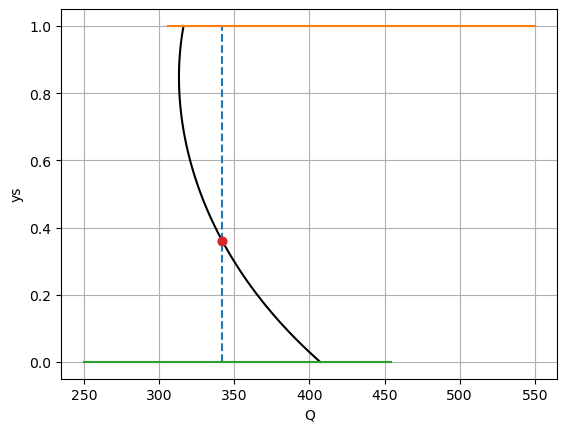

In [7]:
# Solve for the ice line
ys = np.linspace(0, 1, 100);
Qs = Kfunc(ys);
plt.plot(Qs, ys, 'k')
plt.plot([Q0, Q0], [0, 1], '--')
plt.plot([Qmin, 550], [1, 1])
plt.plot([250, Qmax], [0, 0])
plt.xlabel('Q');
plt.ylabel('ys');
plt.grid(1)

# We can obtain the ice-line positions via Newton's. 
# At the value of Q0 = 342, to obtain the ice line 
# solve the equation 342 = Qfunc(ys) for the ys. 
fwd = lambda ys: Q0 - Qfunc(ys)
sol = root(fwd, 0.2)
print(sol.message)
ys_low = sol.x[0]
print("lower ice line = ", ys_low)
sol = root(fwd, 0.9)
print(sol.message)
ys_high = sol.x[0]
print("higher ice line = ", ys_high)
plt.plot([Q0, Q0], [ys_low, ys_high], 'o')
# plt.savefig('ys_vs_Q.png')

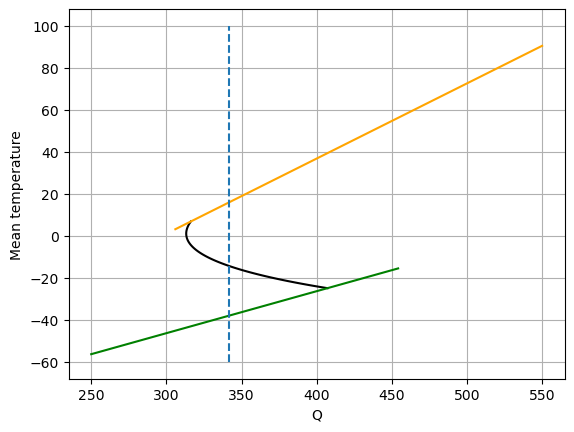

In [8]:
# Plot mean temperature vs. Q
plt.plot(Qs, Tbar(ys, Qs), 'k')
Qa = np.linspace(250, Qmax, 5)
plt.plot(Qa, Tbari(Qa), 'g')
Qb = np.linspace(Qmin, 550, 5)
plt.plot(Qb, Tbarw(Qb), 'orange')
plt.plot([Q0, Q0], [-60, 100], '--')
plt.xlabel('Q')
plt.ylabel('Mean temperature')
plt.grid(1)
# plt.savefig('Tbar_vs_Q.pdf')